# Titanic Train

In [1]:
#importing warning libraries to avoid any warning message
import warnings 
warnings.simplefilter("ignore")

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")
df.head() #printing first 5 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe() #statistical summary


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info() #checking the data type od all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()  # checking if null values present in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age']=df['Age'].fillna((df['Age'].mean()))

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# # EDA   (Exploratory Data Analysi

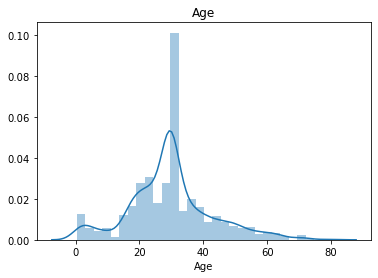

In [12]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


sn.distplot(df['Age'])  #checking distribution of the column
plt.title("Age")
plt.show()

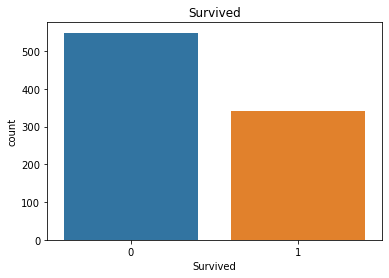

In [22]:
#ploting the survived column 
sn.countplot(df['Survived'])
plt.title("Survived")
plt.show()

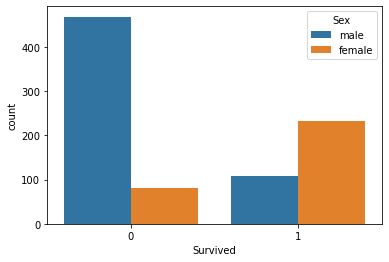

In [26]:
sn.countplot(x='Survived',hue='Sex',data=df)


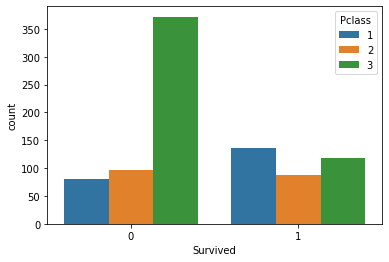

In [27]:
sn.countplot(x='Survived',hue='Pclass',data=df)


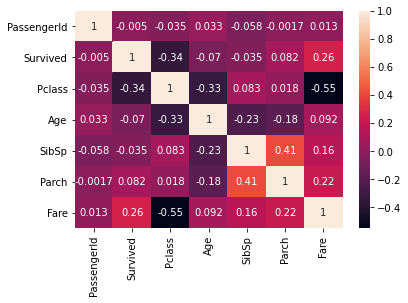

In [19]:
#Checking corelation using heatmap

corr=df.corr()  # df.corr function provides the corelation values of each column 
sn.heatmap(corr,annot=True) #using heatmap we are ploting correlation values obtained by df.corr function.......
#annot=True to put the numbers on the blocks of thr graph 
plt.show()

In [ ]:
df.drop('Cabin',axis=1,inplace=True)


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


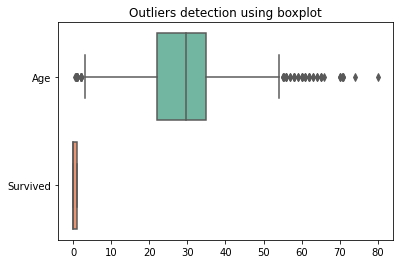

In [35]:
#checking outliers using boxplot
sn.boxplot(data=df[["Age","Survived"]], orient="h", palette="Set2")
plt.title('Outliers detection using boxplot')
plt.show()

In [36]:
df.drop(['Name','Ticket','Fare'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['Sex']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [73]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0


In [68]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold=3
df=df[(z<3).all(axis=1)]

In [70]:

df.shape


(884, 5)

In [72]:
#Checking the Skewness (if exists)
df.skew()

PassengerId    0.004189
Survived       0.470232
Pclass        -0.640927
Sex           -0.606144
Age            0.253127
dtype: float64

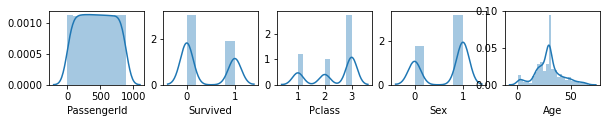

In [74]:
collist=df.columns.values
ncol=8
nrows=10

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot (nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [76]:
#saperated independent and target variables 
x=df.drop("Survived",axis=1)
y=df["Survived"]  #target variable 

In [78]:
#scaling the dataset using standardScaler 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [116]:
#finding best radom state 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range (30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100} found on random state {best_rstate}")


best accuracy 72.08678663541959 found on random state 95


In [118]:
#creating train_test_split using best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=30,random_state=95)

In [119]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100}, Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy= 72.08678663541959, Cross_val_score = 36.084782161020456 & difference = 36.00200447439913


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100}, Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy= 88.1545, Cross_val_score = 26.997292636818525 & difference = 61.15720736318147


best accuracy is obtained by RandomForestRegressor i.e. 88.15

# Serialization

In [146]:
import joblib
joblib.dump(RF,"TitanicTrainProject.pkl")

['TitanicTrainProject.pkl']

In [147]:
joblib.load('TitanicTrainProject.pkl')

RandomForestRegressor()